In [5]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from dateutil import parser
import math
import scipy.signal as ss
from apexpy import Apex
import igrf
from pysolar.solar import *
import scipy.io as io
from scipy import interpolate
import json

In [6]:
on2_mlt=np.load('td_rebin_mlt.npy', allow_pickle=True)
on2_mlon=np.load('td_rebin_mlon.npy', allow_pickle=True)

In [7]:
on2_mlt.shape

(180, 120)

In [8]:
c=np.zeros((on2_mlon.shape[0]//3, on2_mlon.shape[1]//2))
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        for k in range(3):
            for d in range(2):
                l=len(on2_mlt[3*i+k,2*j+d])
                c[i,j]=c[i,j]+l

Text(0, 0.5, 'MLAT (Degree)')

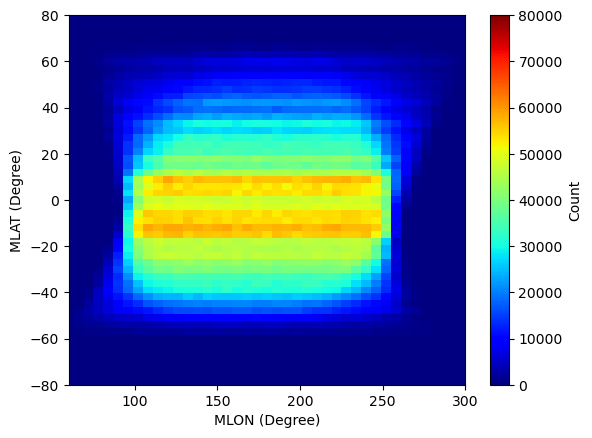

In [10]:
x = np.arange(0, 360, 6)
y = np.arange(-90, 90, 3)
X, Y = np.meshgrid(x, y)
X=np.transpose(X)
Y=np.transpose(Y)
levels=np.arange(0,80000,100)
fig, ax = plt.subplots()
cs= ax.pcolormesh(X,Y,np.transpose(c), vmax=80000, cmap='jet')
cb=plt.colorbar(cs)
cb.set_label('Count')
plt.ylim([-80,80])
plt.xlim([60,300])
plt.xlabel('MLON (Degree)')
plt.ylabel('MLAT (Degree)')

In [11]:
l=on2_mlt[80,40]

In [12]:
x=[]
y=[]
for i in range(len(l)):
    x.append(l[i][0])
    y.append(l[i][1])

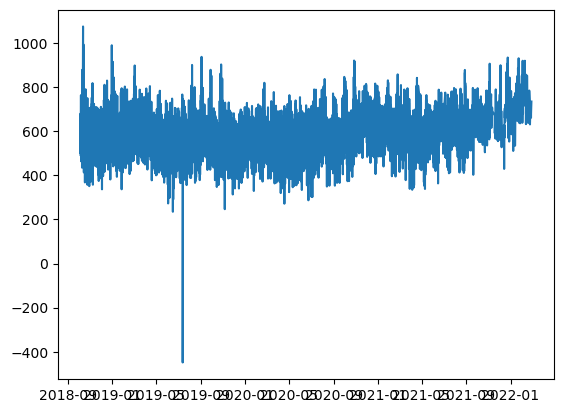

In [13]:
plt.plot(x,y)

In [14]:
dbin=np.array([20, 51, 79, 110, 140, 171, 201, 232, 263, 294, 324, 355])
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Process Kp

In [16]:
f = open('/Users/wzihan/Dropbox (University of Michigan)/Academic/My Paper/gold_asymmetry/kp.json')
data=json.load(f)

In [17]:
kp=data['Kp']
kptime=data['datetime']
for i in range(len(kptime)):
    kptime[i]=datetime.datetime.strptime(kptime[i], '%Y-%m-%dT%H:%M:%SZ')
kptime=np.array(kptime)

# Quiet time only (kp<3)

In [18]:
nlat=60
nlt=60
on2_mlt_month=np.empty((12, nlat, nlt),dtype=object)
on2_mlt_month_dt=np.empty((12, nlat, nlt),dtype=object)

for i in range(12):
    for j in range(nlat):
        for k in range(nlt):
            on2_mlt_month[i,j,k]=[]
            on2_mlt_month_dt[i,j,k]=[]

In [19]:
for j in range(nlat):
    for k in range(nlt):
        for c in range(3):
            for d in range(2):
                l=on2_mlt[3*j+c,2*k+d]
                for t in range(len(l)):
                    dtime=l[t][0]
                    doy=dtime.timetuple().tm_yday 
                    ind=(365*(dtime.year-2018)+doy-1)*8
                    kt=kptime[ind:ind+56]
                    kpindex=np.argmin(abs(dtime-kt))
                    if dtime.year in [2019,2020,2021] and kp[ind+kpindex]<3:
                        on2_mlt_month[np.argmin(abs(dbin-doy)),j,k].append(l[t][1])
                        on2_mlt_month_dt[np.argmin(abs(dbin-doy)),j,k].append(l[t][0])

In [20]:
on2_mlt_month_ave=np.empty((12, nlat, nlt))
on2_mlt_month_std=np.empty((12, nlat, nlt))
on2_mlt_month_cnt=np.empty((12, nlat, nlt))
for i in range(12):
    for j in range(nlat):
        for k in range(nlt):
            if len(on2_mlt_month[i,j,k])<500:
                on2_mlt_month_ave[i,j,k]=np.nan
                on2_mlt_month_std[i,j,k]=np.nan
                on2_mlt_month_cnt[i,j,k]=0
            else:
                on2_mlt_month_ave[i,j,k]=np.mean(on2_mlt_month[i,j,k])
                on2_mlt_month_std[i,j,k]=np.std(on2_mlt_month[i,j,k])
                on2_mlt_month_cnt[i,j,k]=len(on2_mlt_month[i,j,k])
            if j>22 and j<37:
                on2_mlt_month_ave[i,j,k]=np.nan
                on2_mlt_month_std[i,j,k]=np.nan
                on2_mlt_month_cnt[i,j,k]=0

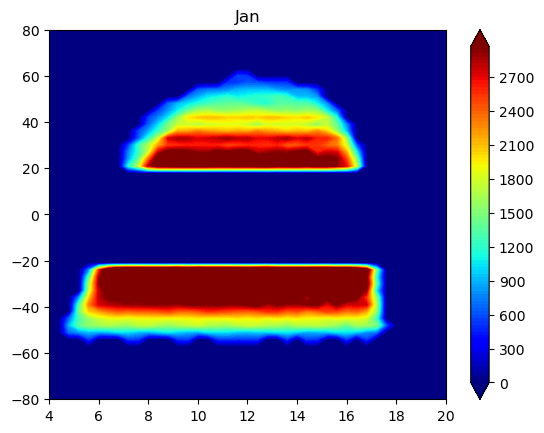

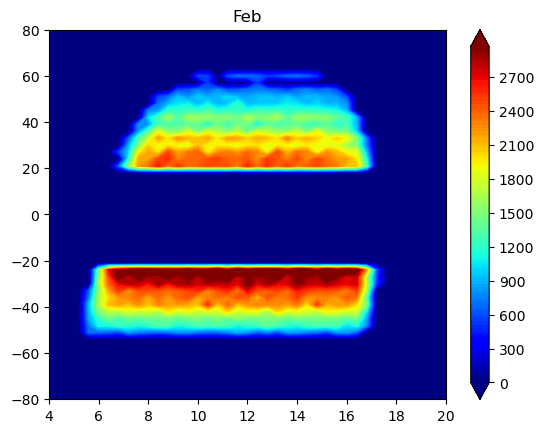

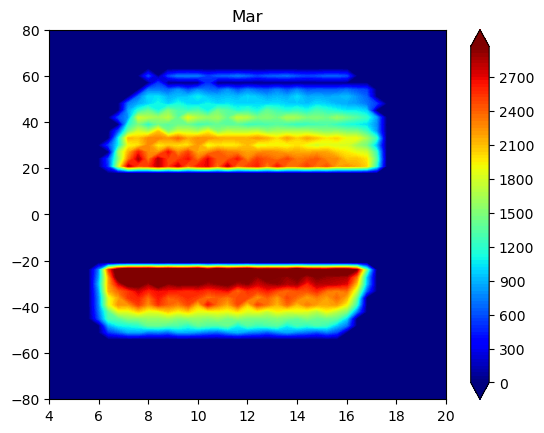

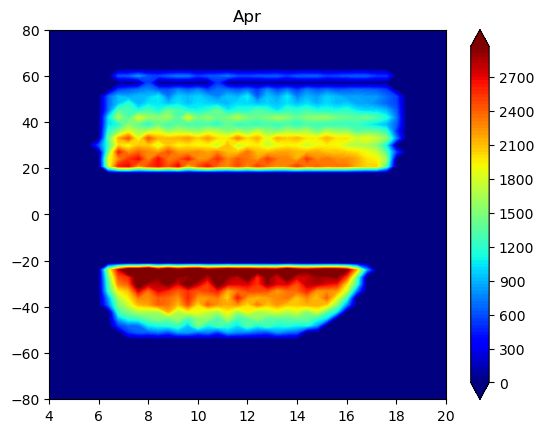

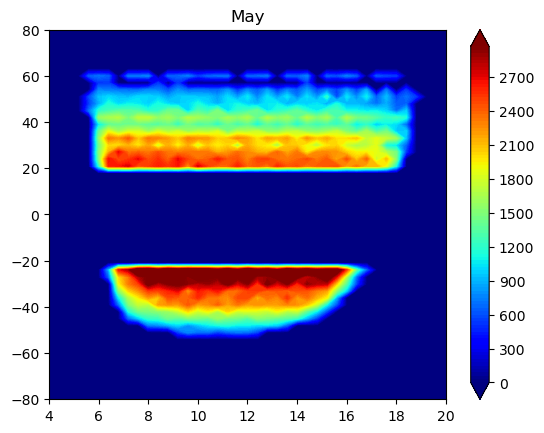

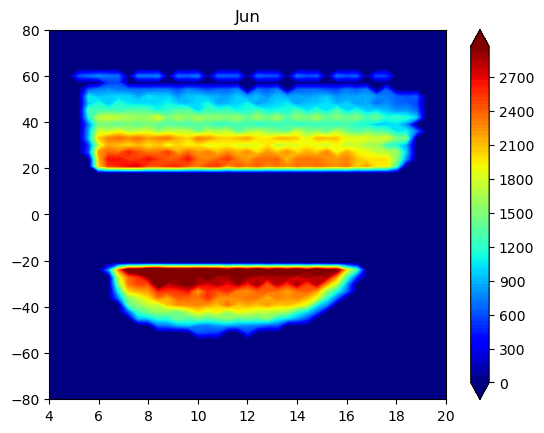

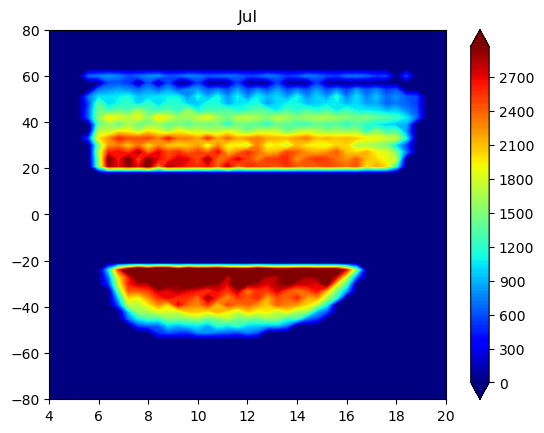

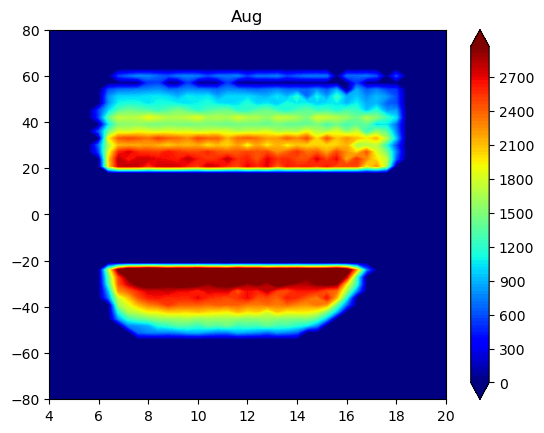

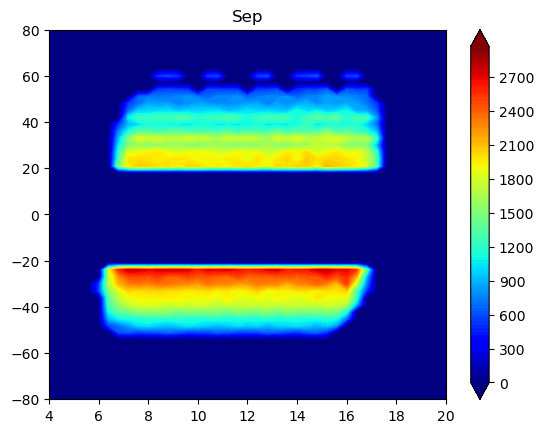

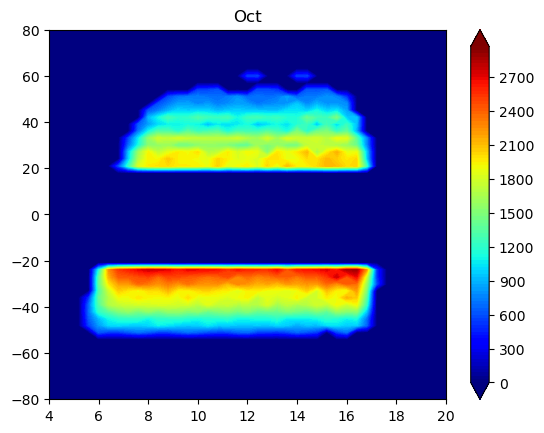

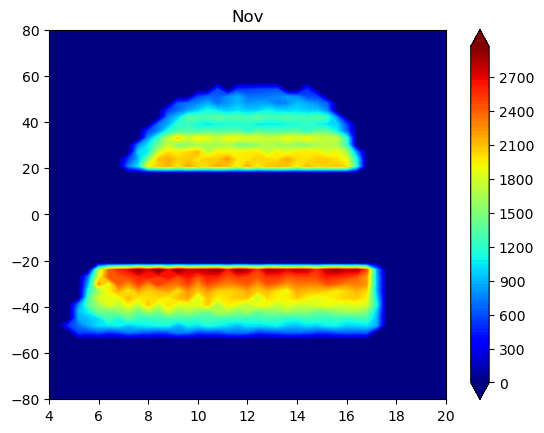

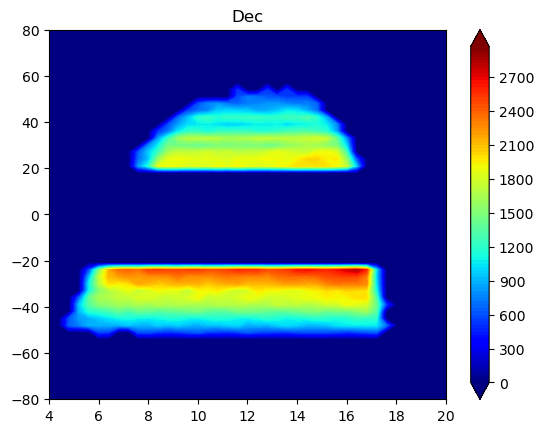

In [21]:
x = np.arange(0, 24, 0.4)
y = np.arange(-90, 90, 3)
X, Y = np.meshgrid(x, y)
X=np.transpose(X)
Y=np.transpose(Y)
levels=np.arange(0,3000,30)
for i in range(12):
    fig, ax = plt.subplots()
    cs= ax.contourf(X,Y,np.transpose(on2_mlt_month_cnt[i,:,:]),levels=levels, cmap='jet', extend='both')
    cb=plt.colorbar(cs)
    plt.ylim([-80,80])
    plt.xlim([4,20])
    plt.title(month[i])
    # pyplot.savefig('/Users/wzihan/plot/gold/on2_month_mlt_'+str(i+1))

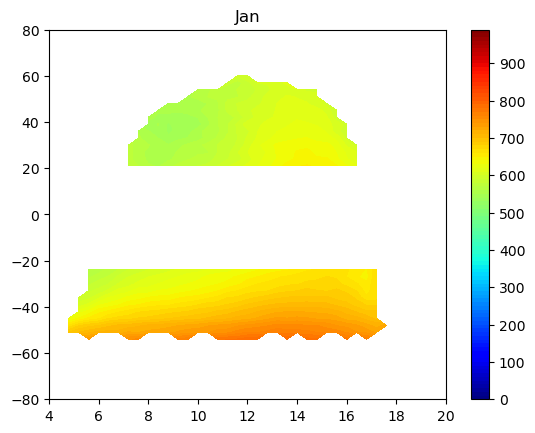

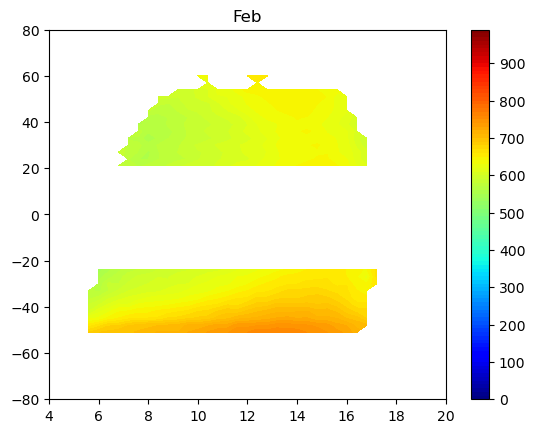

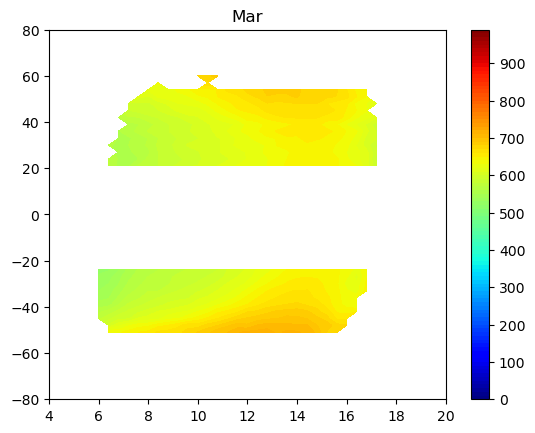

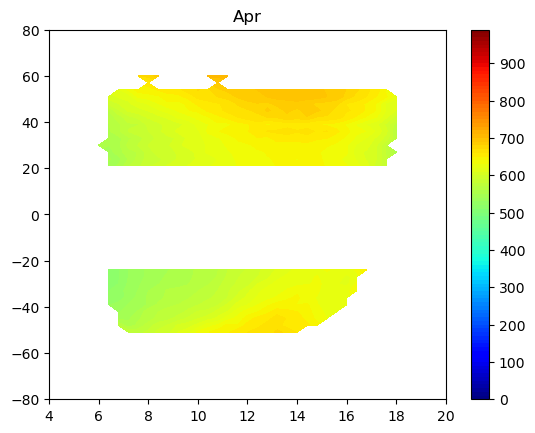

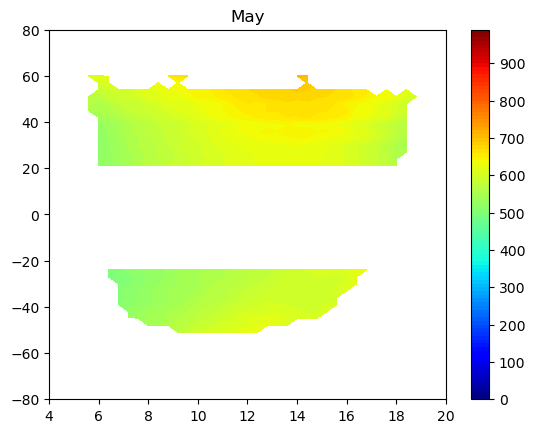

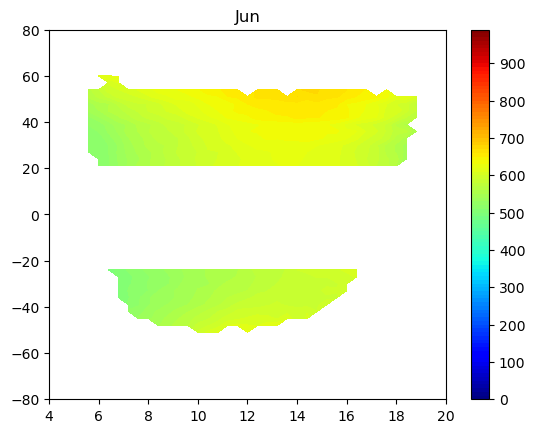

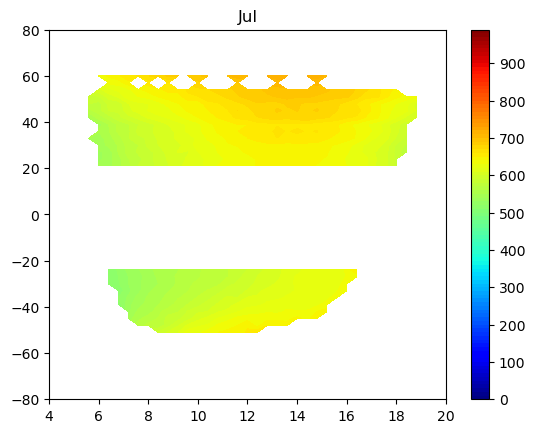

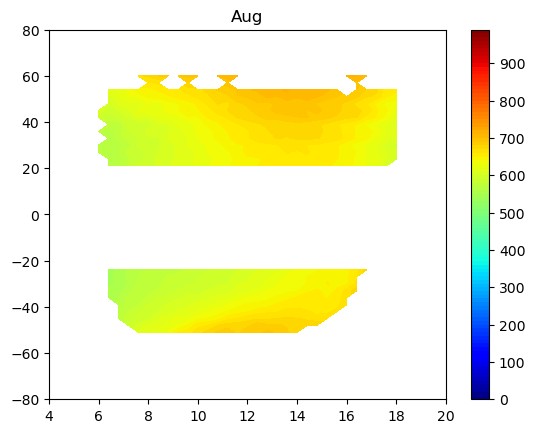

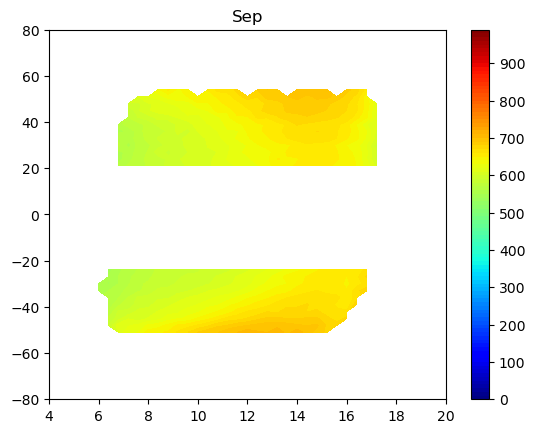

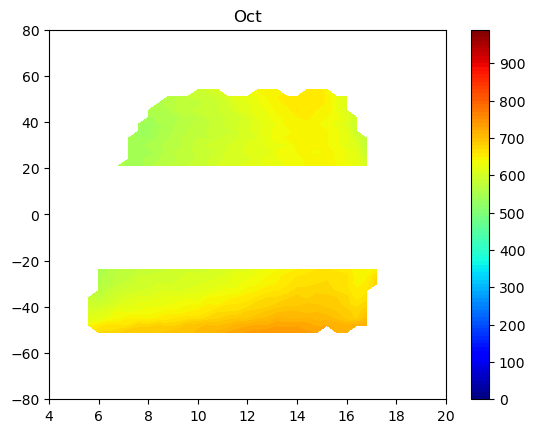

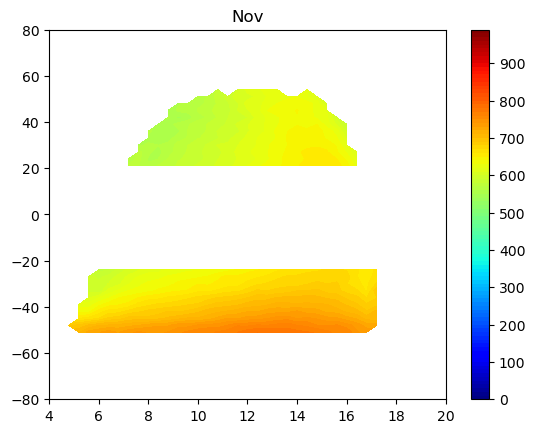

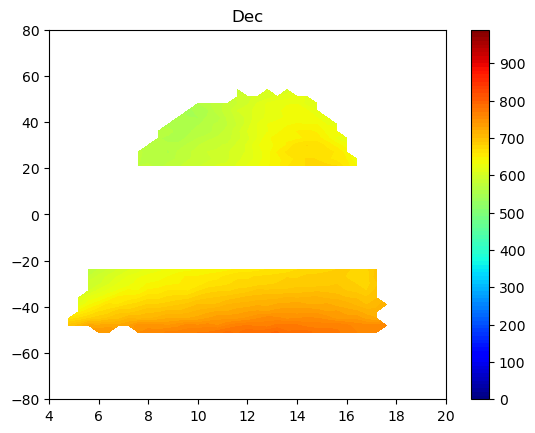

In [22]:
x = np.arange(0, 24, 0.4)
y = np.arange(-90, 90, 3)
X, Y = np.meshgrid(x, y)
X=np.transpose(X)
Y=np.transpose(Y)
levels=np.arange(0,1000,10)
for i in range(12):
    fig, ax = plt.subplots()
    cs= ax.contourf(X,Y,np.transpose(on2_mlt_month_ave[i,:,:]),levels=levels, cmap='jet')
    cb=plt.colorbar(cs)
    plt.ylim([-80,80])
    plt.xlim([4,20])
    plt.title(month[i])
    # pyplot.savefig('/Users/wzihan/plot/gold/on2_month_mlt_'+str(i+1))

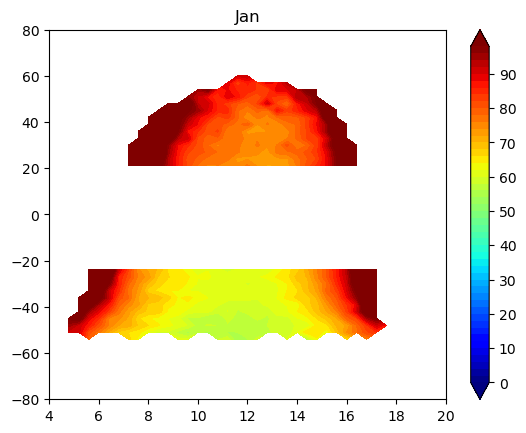

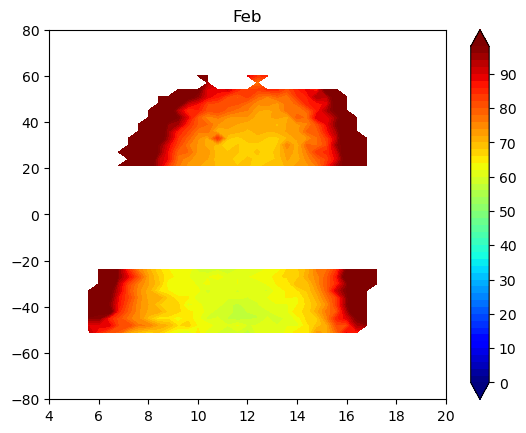

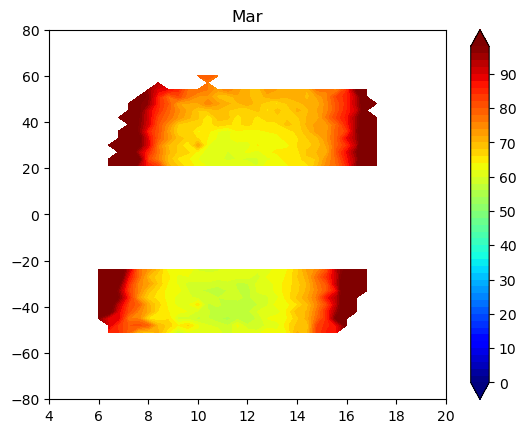

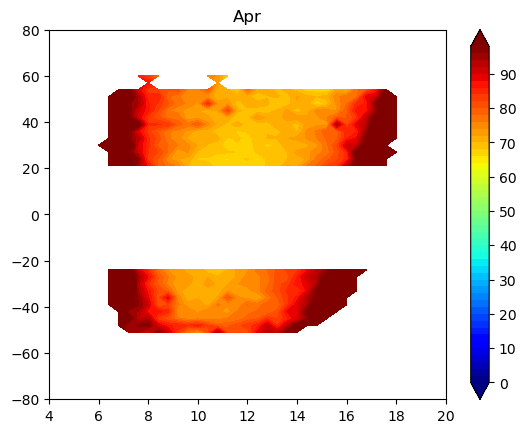

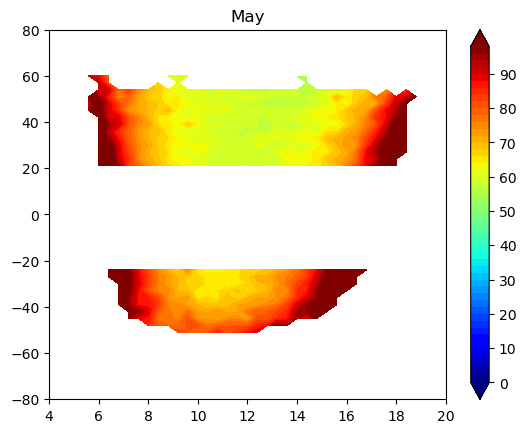

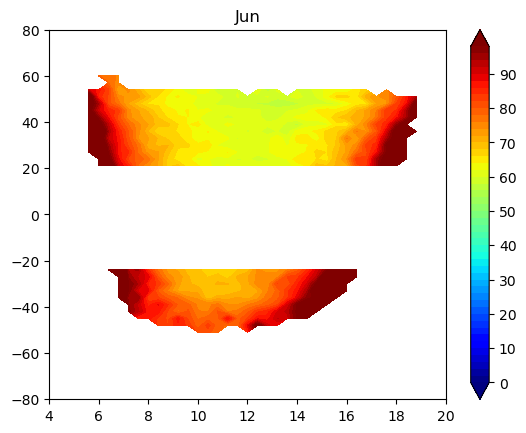

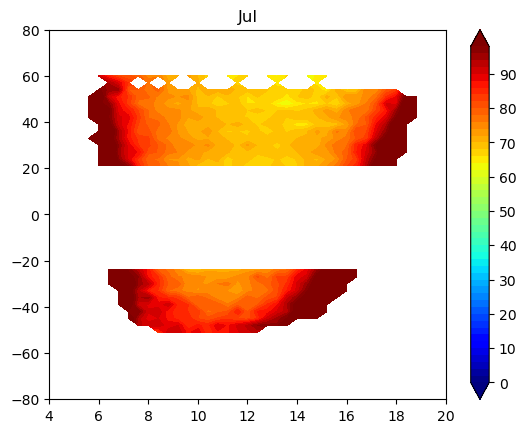

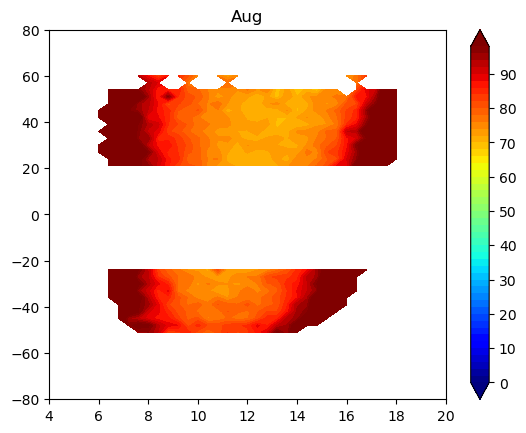

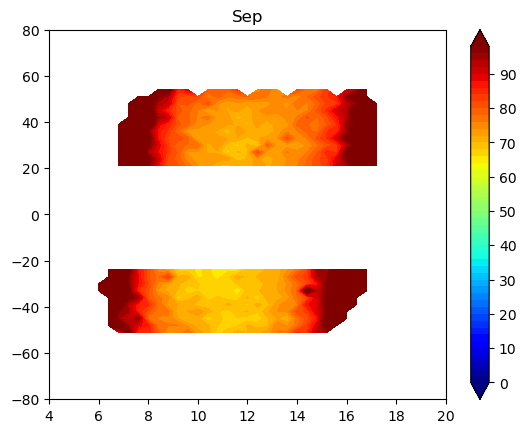

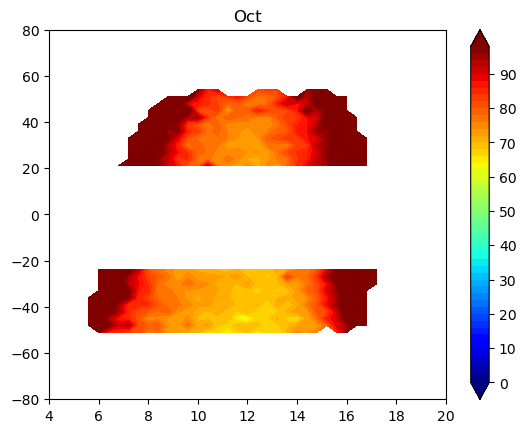

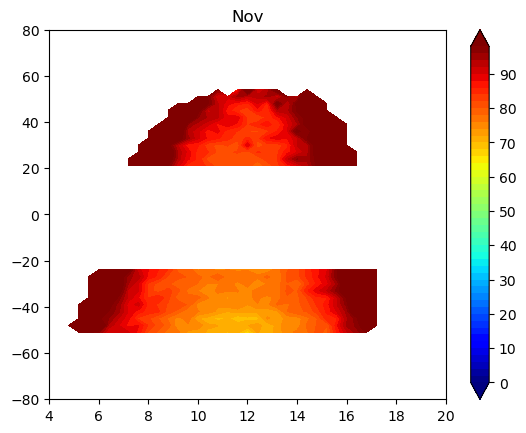

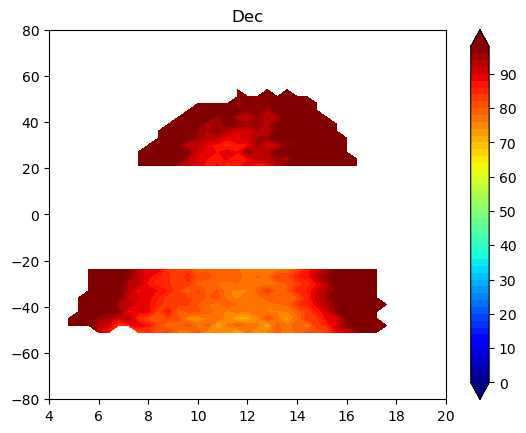

In [23]:
levels=np.arange(0,100,2)
for i in range(12):
    fig, ax = plt.subplots()
    cs= ax.contourf(X,Y,np.transpose(on2_mlt_month_std[i,:,:]),levels=levels, cmap='jet', extend='both')
    cb=plt.colorbar(cs)
    plt.ylim([-80,80])
    plt.xlim([4,20])
    plt.title(month[i])
    # pyplot.savefig('/Users/wzihan/plot/gold/on2_month_mlt_'+str(i+1))

# Monthly-average Global Delta O/N2 

In [24]:
delta=np.zeros((12, nlat//2, nlt))

for i in range(12):
    for j in range(nlat//2):
        for k in range(nlt):
            s=on2_mlt_month_ave[i,nlat-1-j,k]+on2_mlt_month_ave[i,j,k]
            diff=on2_mlt_month_ave[i,nlat-1-j,k]-on2_mlt_month_ave[i,j,k]
            delta[i,nlat//2-1-j,k]=2*diff/s

In [25]:
x = np.arange(0, 24, 0.4)
y = np.arange(0, 90, 3)
X, Y = np.meshgrid(x, y)
X=np.transpose(X)
Y=np.transpose(Y)

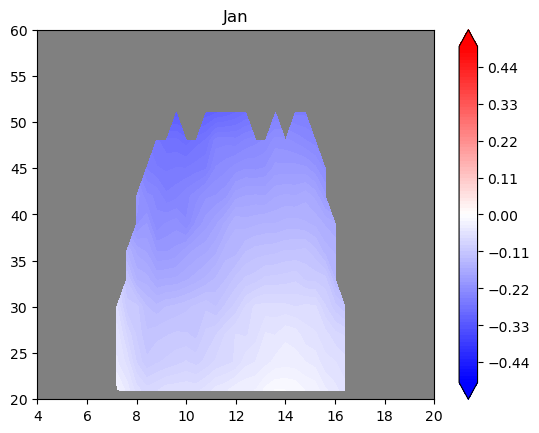

In [26]:
levels=np.linspace(-0.5,0.5,101)
fig=plt.figure()
axs = fig.subplots(1, 1, sharex='col', sharey='row')

i=0
axs.set_facecolor("grey")  
cs= axs.contourf(X,Y,np.transpose(delta[i,:,:]),levels=levels, cmap='bwr', extend='both')
axs.set_ylim([20,60])
axs.set_xlim([4,20])
axs.set_title(month[i])
fig.colorbar(cs)

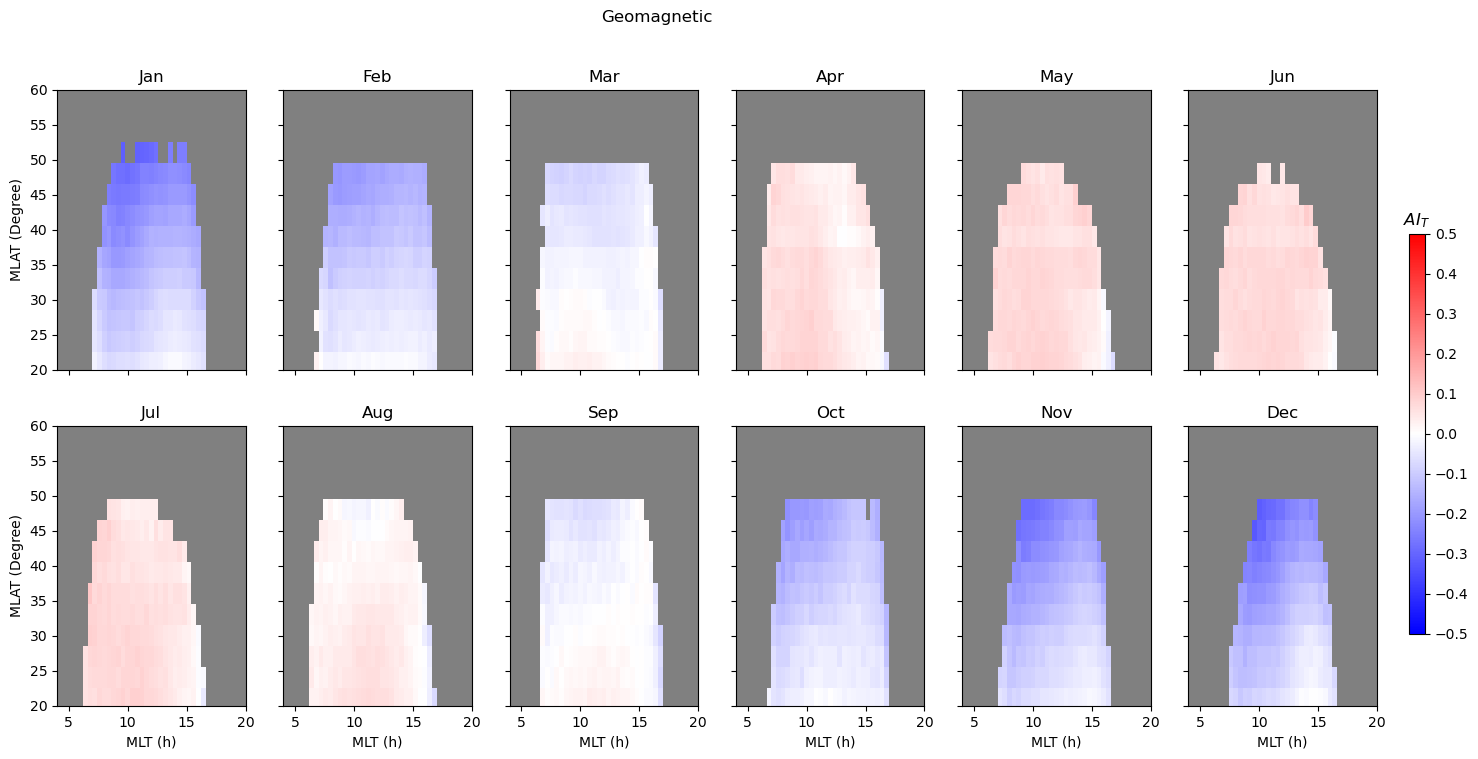

In [27]:
fig=plt.figure(figsize=(16,8))
axs = fig.subplots(2, 6, sharex='col', sharey='row')

for i in range(12):
    axs[i//6, i%6].set_facecolor("grey")  
    cs= axs[i//6, i%6].pcolormesh(X,Y,np.transpose(delta[i,:,:]),vmax=0.5, vmin=-0.5, cmap='bwr')
    axs[i//6, i%6].set_ylim([20,60])
    axs[i//6, i%6].set_xlim([4,20])
    axs[i//6, i%6].set_title(month[i])
    if i//6==1:
        axs[i//6, i%6].set_xlabel('MLT (h)')
    if i% 6 ==0:
        axs[i//6, i%6].set_ylabel('MLAT (Degree)')
#     # pyplot.savefig('/Users/wzihan/plot/gold/on2_diff_month_mlt_'+str(i+1))
# plt.colorbar(cs)
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.97, 0.2, 0.01, 0.5])
cb=fig.colorbar(cs, cax=cbar_ax)
cb.set_ticks(np.linspace(-0.5,0.5,11))
fig.suptitle('Geomagnetic')
cbar_ax.set_title('$AI_{T}$')
plt.savefig('4b.svg')

([<matplotlib.axis.XTick at 0x7fe91256eca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

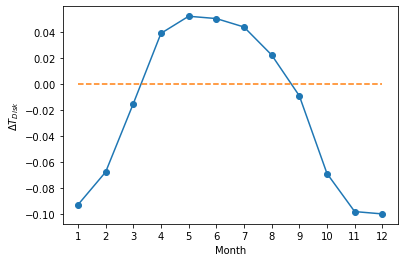

In [81]:
g=[]
for i in range(12):
    g.append(np.nanmean(delta[i,:,:]))
plt.plot(np.linspace(1,12,12), g, 'o-')
plt.plot([1,6,12], [0,0,0], '--')
plt.ylabel('$\Delta T_{Disk}$')
plt.xlabel('Month')
plt.xticks(np.linspace(1,12,12))

# Daily O/N2 change

In [19]:
mlat=-30
mlt=12
mlat_index=(90+mlat)//3
mlt_index=mlt*15//3

In [20]:
def mag2geo_sphere_apex(mlat,mlt,h,t):
    
    # GEOPACK is based on a centered dipole coordinate.
    
    A = Apex(date=t)
    mlon = A.mlt2mlon(mlt, t)
    lat, lon = A.convert(mlat, mlon, 'apex', 'geo', height=0)
    return lat, lon

In [21]:
a = igrf.igrf('2010-07-12', glat=65, glon=-148, alt_km=100)

In [22]:
a

<xarray.Dataset>
Dimensions:  (alt_km: 1)
Coordinates:
  * alt_km   (alt_km) int64 100
Data variables:
    north    (alt_km) float64 1.122e+04
    east     (alt_km) float64 4.148e+03
    down     (alt_km) float64 5.302e+04
    total    (alt_km) float64 5.436e+04
    incl     (alt_km) float64 77.29
    decl     (alt_km) float64 20.29
Attributes:
    time:     2010-07-12
    isv:      0
    itype:    1
    glat:     65
    glon:     -148

In [23]:
b=[[],[]]
inc=[[],[]]
dec=[[],[]]
for i in range(len(on2_mlt_month[0,mlat_index, mlt_index])):
    lat, lon = mag2geo_sphere_apex(mlat,mlt,0,on2_mlt_month_dt[0,mlat_index, mlt_index][i])
    mag=igrf.igrf(on2_mlt_month_dt[0,mlat_index, mlt_index][i], glat=lat, glon=lon, alt_km=150)
    b[0].append(mag.total.to_numpy()[0])
    inc[0].append(mag.incl.to_numpy()[0])
    dec[0].append(mag.decl.to_numpy()[0])
    
for i in range(len(on2_mlt_month[0,59-mlat_index, mlt_index])):
    lat, lon = mag2geo_sphere_apex(-mlat,mlt,0,on2_mlt_month_dt[0,59-mlat_index, mlt_index][i])
    mag=igrf.igrf(on2_mlt_month_dt[0,59-mlat_index, mlt_index][i], glat=lat, glon=lon, alt_km=150)
    b[1].append(mag.total.to_numpy()[0])
    inc[1].append(mag.incl.to_numpy()[0])
    dec[1].append(mag.decl.to_numpy()[0])

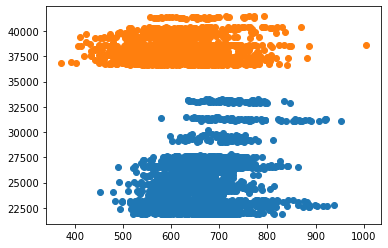

In [24]:
plt.scatter(on2_mlt_month[0,mlat_index, mlt_index],b[0])
plt.scatter(on2_mlt_month[0,59-mlat_index, mlt_index],b[1])

In [25]:
z=np.concatenate((np.array(on2_mlt_month[0,mlat_index, mlt_index]).reshape(-1,1), np.array(b[0]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.2561381825865807

In [26]:
z=np.concatenate((np.array(on2_mlt_month[0,59-mlat_index, mlt_index]).reshape(-1,1), np.array(b[1]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.07332072534118143

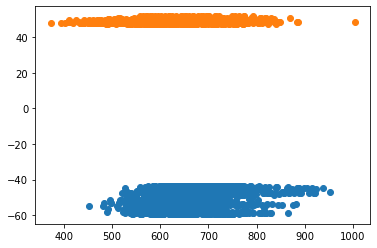

In [27]:
plt.scatter(on2_mlt_month[0,mlat_index, mlt_index],inc[0])
plt.scatter(on2_mlt_month[0,59-mlat_index, mlt_index],inc[1])

In [28]:
z=np.concatenate((np.array(on2_mlt_month[0,mlat_index, mlt_index]).reshape(-1,1), np.array(inc[0]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.22898734258789485

In [29]:
z=np.concatenate((np.array(on2_mlt_month[0,59-mlat_index, mlt_index]).reshape(-1,1), np.array(inc[1]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.14431645369780519

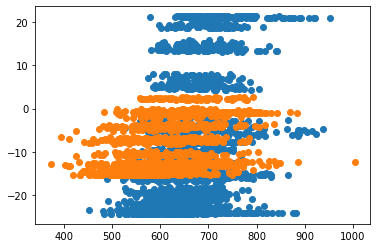

In [30]:
plt.scatter(on2_mlt_month[0,mlat_index, mlt_index],dec[0])
plt.scatter(on2_mlt_month[0,59-mlat_index, mlt_index],dec[1])

In [31]:
z=np.concatenate((np.array(on2_mlt_month[0,mlat_index, mlt_index]).reshape(-1,1), np.array(dec[0]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.3784058661507226

In [32]:
z=np.concatenate((np.array(on2_mlt_month[0,59-mlat_index, mlt_index]).reshape(-1,1), np.array(dec[1]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.3299110449352362

In [33]:
sza=[[],[]]
for i in range(len(on2_mlt_month[0,mlat_index, mlt_index])):
    lat, lon = mag2geo_sphere_apex(mlat,mlt,0,on2_mlt_month_dt[0,mlat_index, mlt_index][i])
    sza[0].append(float(90)-get_altitude(lat, lon, on2_mlt_month_dt[0,mlat_index, mlt_index][i].replace(tzinfo=datetime.timezone.utc)))
    
for i in range(len(on2_mlt_month[0,59-mlat_index, mlt_index])):
    lat, lon = mag2geo_sphere_apex(-mlat,mlt,0,on2_mlt_month_dt[0,59-mlat_index, mlt_index][i])
    sza[1].append(float(90)-get_altitude(lat, lon, on2_mlt_month_dt[0,59-mlat_index, mlt_index][i].replace(tzinfo=datetime.timezone.utc)))

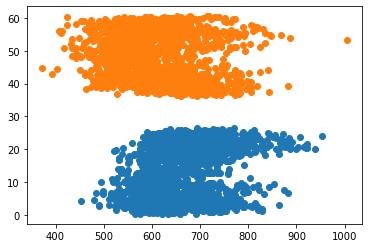

In [34]:
plt.scatter(on2_mlt_month[0,mlat_index, mlt_index],sza[0])
plt.scatter(on2_mlt_month[0,59-mlat_index, mlt_index],sza[1])

In [35]:
z=np.concatenate((np.array(on2_mlt_month[0,mlat_index, mlt_index]).reshape(-1,1), np.array(sza[0]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.30809693658887244

In [36]:
z=np.concatenate((np.array(on2_mlt_month[0,59-mlat_index, mlt_index]).reshape(-1,1), np.array(sza[1]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

-0.12309651882814633

In [37]:
doy=[[], []]
for i in range(len(on2_mlt_month[0,mlat_index, mlt_index])):
    dd=on2_mlt_month_dt[0,mlat_index, mlt_index][i]-datetime.datetime(2019,1,1)
    doy[0].append((dd.total_seconds()/86400)%365)
    
for i in range(len(on2_mlt_month[0,59-mlat_index, mlt_index])):
    dd=on2_mlt_month_dt[0,59-mlat_index, mlt_index][i]-datetime.datetime(2019,1,1)
    doy[1].append((dd.total_seconds()/86400)%365)

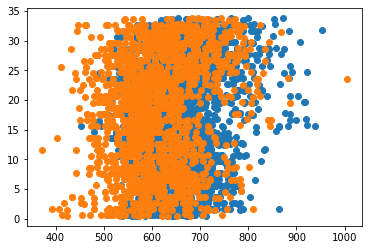

In [38]:
plt.scatter(on2_mlt_month[0,mlat_index, mlt_index],doy[0])
plt.scatter(on2_mlt_month[0,59-mlat_index, mlt_index],doy[1])

In [39]:
z=np.concatenate((np.array(on2_mlt_month[0,mlat_index, mlt_index]).reshape(-1,1), np.array(doy[0]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.14367878480962773

In [40]:
z=np.concatenate((np.array(on2_mlt_month[0,59-mlat_index, mlt_index]).reshape(-1,1), np.array(doy[1]).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.2061335743281471

In [41]:
jh=io.readsav('W05HeatingVer3_2019.xdr')

In [42]:
jh

{'mjtimes': array([58484.00277778, 58484.00555556, 58484.00833333, ...,
        58848.99444444, 58848.99722222, 58849.        ]),
 'doyheating': array([  1.00277778,   1.00555556,   1.00833333, ..., 365.99444444,
        365.99722222, 366.        ]),
 'validtimes': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
 'heatingn': array([ 6.9284244,  6.932189 ,  7.261735 , ..., 14.108732 , 14.626743 ,
        14.656614 ], dtype=float32),
 'heatings': array([13.860221 , 13.9268465, 15.300811 , ..., 34.495888 , 35.680664 ,
        35.719666 ], dtype=float32)}

In [43]:
doy=jh['doyheating']
jhn=jh['heatingn']
jhs=jh['heatings']

In [44]:
fn = interpolate.interp1d(doy, jhn)
fs = interpolate.interp1d(doy, jhs)

In [45]:
jhn_s=np.mean(jhn.reshape(365,-1), axis=1)
jhs_s=np.mean(jhs.reshape(365,-1), axis=1)

(array([ 76, 271, 272]),)
-0.00355627 0.5774284


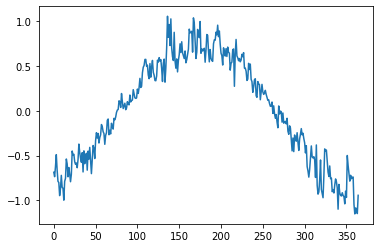

In [46]:
from scipy.signal import savgol_filter
djh=2*(jhn_s-jhs_s)/(jhn_s+jhs_s)
yhat = savgol_filter(djh, 61, 3)
plt.plot(djh)
print(np.where(abs(djh)<1e-2))
print(np.mean(djh), np.std(djh))

In [47]:
jhng=[]
jhsg=[]
for i in range(len(on2_mlt_month[0,mlat_index, mlt_index])):
    dd=on2_mlt_month_dt[0,mlat_index, mlt_index][i]-datetime.datetime(2019,1,1)
    jhsg.append(fs(dd.total_seconds()/86400%365+1))

for i in range(len(on2_mlt_month[0,59-mlat_index, mlt_index])):
    dd=on2_mlt_month_dt[0,59-mlat_index, mlt_index][i]-datetime.datetime(2019,1,1)
    jhng.append(fn(dd.total_seconds()/86400%365+1))

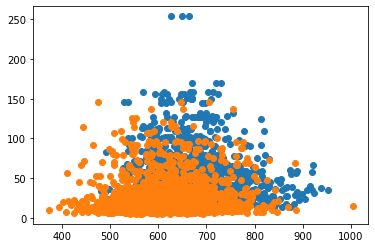

In [48]:
plt.scatter(on2_mlt_month[0,mlat_index, mlt_index],jhsg)
plt.scatter(on2_mlt_month[0,59-mlat_index, mlt_index],jhng)

In [49]:
z=np.concatenate((np.array(on2_mlt_month[0,mlat_index, mlt_index]).reshape(-1,1), np.array(jhsg).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

-0.016124215959672977

In [50]:
z=np.concatenate((np.array(on2_mlt_month[0,59-mlat_index, mlt_index]).reshape(-1,1), np.array(jhng).reshape(-1,1)), axis=1)
cc =np.corrcoef(z, rowvar=False)[0,1]
cc

0.053693611394063076

# Driver

In [51]:
mlat=-20
mlt=12
mlat_index=(90+mlat)//3
mlt_index=mlt*15//3

In [52]:
b_mlt_hn=np.empty((24),dtype=object)
b_mlt_hs=np.empty((24),dtype=object)

for i in range(24):
    lat, lon = mag2geo_sphere_apex(-mlat,mlt,0,datetime.datetime(2019,1,1,i,0,0))
    mag=igrf.igrf(datetime.datetime(2019,1,1,i,0,0), glat=lat, glon=lon, alt_km=150)
    b_mlt_hn[i]=mag
    lat, lon = mag2geo_sphere_apex(mlat,mlt,0,datetime.datetime(2019,1,1,i,0,0))
    mag=igrf.igrf(datetime.datetime(2019,1,1,i,0,0), glat=lat, glon=lon, alt_km=150)
    b_mlt_hs[i]=mag

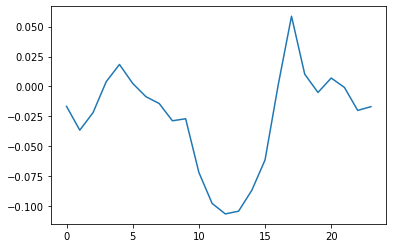

In [53]:
bn=np.array([b_mlt_hn[i].incl.to_numpy()[0] for i in range(24)])
bs=np.array([-b_mlt_hs[i].incl.to_numpy()[0] for i in range(24)])

deltab=2*(bn-bs)/(bn+bs)
plt.plot(deltab)

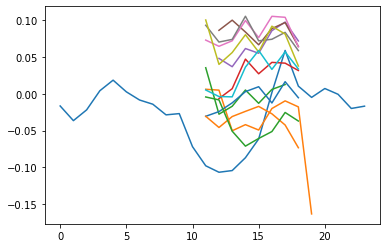

In [54]:
plt.plot(deltab)
for m in range(12):
    s=on2_mlt_month[m,mlat_index,mlt_index]
    n=on2_mlt_month[m,59-mlat_index,mlt_index]
    sdt=on2_mlt_month_dt[m,mlat_index,mlt_index]
    ndt=on2_mlt_month_dt[m,59-mlat_index,mlt_index]

    on2_mlt_hn=np.empty((24),dtype=object)
    on2_mlt_hs=np.empty((24),dtype=object)
    b_mlt_hn=np.empty((24),dtype=object)
    b_mlt_hs=np.empty((24),dtype=object)

    for i in range(24):
        on2_mlt_hn[i]=[]
        on2_mlt_hs[i]=[]
        lat, lon = mag2geo_sphere_apex(-mlat,mlt,0,datetime.datetime(2019,1,1,i,0,0))
        mag=igrf.igrf(datetime.datetime(2019,1,1,i,0,0), glat=lat, glon=lon, alt_km=150)
        b_mlt_hn[i]=mag
        lat, lon = mag2geo_sphere_apex(mlat,mlt,0,datetime.datetime(2019,1,1,i,0,0))
        mag=igrf.igrf(datetime.datetime(2019,1,1,i,0,0), glat=lat, glon=lon, alt_km=150)
        b_mlt_hs[i]=mag

    for t in range(len(n)):
        dtime=ndt[t]
        h=dtime.hour
        on2_mlt_hn[h].append(n[t])

    for t in range(len(s)):
        dtime=sdt[t]
        h=dtime.hour
        on2_mlt_hs[h].append(s[t])

    on2_mlt_hn_ave=np.empty((24))
    on2_mlt_hn_std=np.empty((24))
    on2_mlt_hs_ave=np.empty((24))
    on2_mlt_hs_std=np.empty((24))

    for i in range(24):
        if len(on2_mlt_hn[i])==0:
            on2_mlt_hn_ave[i]=np.nan
            on2_mlt_hn_std[i]=np.nan
        else:
            on2_mlt_hn_ave[i]=np.mean(on2_mlt_hn[i])
            on2_mlt_hn_std[i]=np.std(on2_mlt_hn[i])

        if len(on2_mlt_hs[i])==0:
            on2_mlt_hs_ave[i]=np.nan
            on2_mlt_hs_std[i]=np.nan
        else:
            on2_mlt_hs_ave[i]=np.mean(on2_mlt_hs[i])
            on2_mlt_hs_std[i]=np.std(on2_mlt_hs[i])

#     plt.errorbar(np.linspace(0,23,24), on2_mlt_hn_ave, yerr=on2_mlt_hn_std, fmt='o', capsize=3)
#     plt.errorbar(np.linspace(0,23,24), on2_mlt_hs_ave, yerr=on2_mlt_hs_std, fmt='o', capsize=3)

    s=on2_mlt_hn_ave+on2_mlt_hs_ave
    diff=on2_mlt_hn_ave-on2_mlt_hs_ave
    delta=2*diff/s

    plt.plot(delta)

In [55]:
mlat=-30
mlt=12
mlat_index=(90+mlat)//3
mlt_index=mlt*15//3

In [56]:
b_mlt_hn=np.empty((24),dtype=object)
b_mlt_hs=np.empty((24),dtype=object)

for i in range(24):
    lat, lon = mag2geo_sphere_apex(-mlat,mlt,0,datetime.datetime(2019,1,1,i,0,0))
    mag=igrf.igrf(datetime.datetime(2019,1,1,i,0,0), glat=lat, glon=lon, alt_km=150)
    b_mlt_hn[i]=mag
    lat, lon = mag2geo_sphere_apex(mlat,mlt,0,datetime.datetime(2019,1,1,i,0,0))
    mag=igrf.igrf(datetime.datetime(2019,1,1,i,0,0), glat=lat, glon=lon, alt_km=150)
    b_mlt_hs[i]=mag

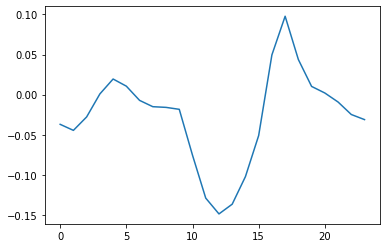

In [57]:
bn=np.array([b_mlt_hn[i].incl.to_numpy()[0] for i in range(24)])
bs=np.array([-b_mlt_hs[i].incl.to_numpy()[0] for i in range(24)])

deltab=2*(bn-bs)/(bn+bs)
plt.plot(deltab)

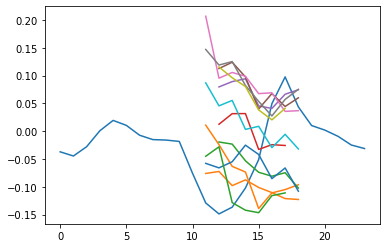

In [58]:
plt.plot(deltab)
for m in range(12):
    s=on2_mlt_month[m,mlat_index,mlt_index]
    n=on2_mlt_month[m,59-mlat_index,mlt_index]
    sdt=on2_mlt_month_dt[m,mlat_index,mlt_index]
    ndt=on2_mlt_month_dt[m,59-mlat_index,mlt_index]

    on2_mlt_hn=np.empty((24),dtype=object)
    on2_mlt_hs=np.empty((24),dtype=object)
    b_mlt_hn=np.empty((24),dtype=object)
    b_mlt_hs=np.empty((24),dtype=object)

    for i in range(24):
        on2_mlt_hn[i]=[]
        on2_mlt_hs[i]=[]
        lat, lon = mag2geo_sphere_apex(-mlat,mlt,0,datetime.datetime(2019,1,1,i,0,0))
        mag=igrf.igrf(datetime.datetime(2019,1,1,i,0,0), glat=lat, glon=lon, alt_km=150)
        b_mlt_hn[i]=mag
        lat, lon = mag2geo_sphere_apex(mlat,mlt,0,datetime.datetime(2019,1,1,i,0,0))
        mag=igrf.igrf(datetime.datetime(2019,1,1,i,0,0), glat=lat, glon=lon, alt_km=150)
        b_mlt_hs[i]=mag

    for t in range(len(n)):
        dtime=ndt[t]
        h=dtime.hour
        on2_mlt_hn[h].append(n[t])

    for t in range(len(s)):
        dtime=sdt[t]
        h=dtime.hour
        on2_mlt_hs[h].append(s[t])

    on2_mlt_hn_ave=np.empty((24))
    on2_mlt_hn_std=np.empty((24))
    on2_mlt_hs_ave=np.empty((24))
    on2_mlt_hs_std=np.empty((24))

    for i in range(24):
        if len(on2_mlt_hn[i])==0:
            on2_mlt_hn_ave[i]=np.nan
            on2_mlt_hn_std[i]=np.nan
        else:
            on2_mlt_hn_ave[i]=np.mean(on2_mlt_hn[i])
            on2_mlt_hn_std[i]=np.std(on2_mlt_hn[i])

        if len(on2_mlt_hs[i])==0:
            on2_mlt_hs_ave[i]=np.nan
            on2_mlt_hs_std[i]=np.nan
        else:
            on2_mlt_hs_ave[i]=np.mean(on2_mlt_hs[i])
            on2_mlt_hs_std[i]=np.std(on2_mlt_hs[i])

#     plt.errorbar(np.linspace(0,23,24), on2_mlt_hn_ave, yerr=on2_mlt_hn_std, fmt='o', capsize=3)
#     plt.errorbar(np.linspace(0,23,24), on2_mlt_hs_ave, yerr=on2_mlt_hs_std, fmt='o', capsize=3)

    s=on2_mlt_hn_ave+on2_mlt_hs_ave
    diff=on2_mlt_hn_ave-on2_mlt_hs_ave
    delta=2*diff/s

    plt.plot(delta)